# Task 5: Decision Tree on Titanic Dataset 
- Load Titanic dataset (or use a similar dataset). 
- Preprocess (handle missing values, encode categorical variables). 
- Train a DecisionTreeClassifier. 
- Visualize the decision tree using plot_tree. 
- Evaluate the model using accuracy and confusion matrix.

In [67]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier , plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix

In [48]:
data = sns.load_dataset("titanic")
y = data['survived']
data.drop(['alive','deck','adult_male','who','embark_town','survived','class','alone'],axis=1,inplace=True)
data.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [76]:
# filled missing values in age as well as embarked
data.fillna({'age' : data['age'].median()}, inplace=True)
data.fillna({'embarked': data['embarked'].mode()[0]}, inplace=True)

# changing into numbers
data['sex'] = data['sex'].map({'male': 0, 'female': 1})
data['embarked'] = data['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

data.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,NaN,22.0,1,0,7.2500,NaN
1,1,NaN,38.0,1,0,71.2833,NaN
2,3,NaN,26.0,0,0,7.9250,NaN
3,1,NaN,35.0,1,0,53.1000,NaN
4,3,NaN,35.0,0,0,8.0500,NaN


In [72]:
X = data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print(y_pred[:10])
print(y_test[:10])

[0 0 0 1 1 1 1 0 1 1]
709    1
439    0
840    0
720    1
39     1
290    1
300    1
333    0
208    1
136    1
Name: survived, dtype: int64


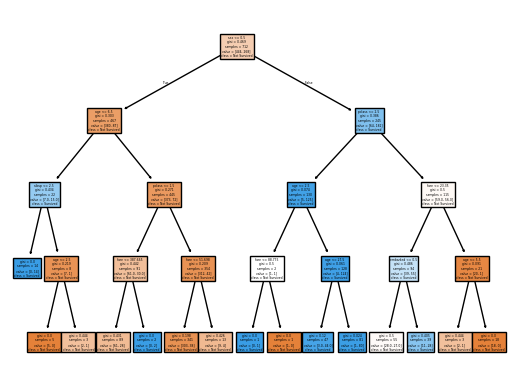

In [73]:
plt.Figure(figsize=(15,8))
plot_tree(dt , feature_names=X.columns , class_names=["Not Survived", "Survived"] , filled=True )
plt.show()

In [74]:
y_pred = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7988826815642458
Confusion Matrix:
 [[96  9]
 [27 47]]


<Axes: >

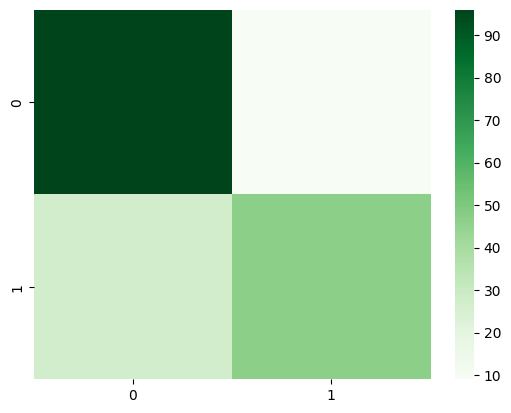

In [75]:
sns.heatmap(confusion_matrix(y_test,y_pred),cmap='Greens')